In [1]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# We can load the MNIST dataset directly using .npz file
data = np.load('mnist.npz', allow_pickle=True)
data_list = data.files

In [18]:
# Now we can separate the dataframe into individual variables
# No data cleaning needed

x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [19]:
#Check to make sure if shape is correct, should be (60000, 28, 28)
x_train.shape

(60000, 28, 28)

In [20]:
x_train[0].shape

(28, 28)

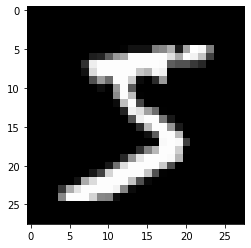

In [21]:
plt.imshow(x_train[0], cmap = 'gray')

In [22]:
#Now need to split 10% of the train dataset to use as validation dataset
from sklearn.model_selection import train_test_split

#Using the train_test_split library to split into train and validation

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [23]:
x_train.shape

(54000, 28, 28)

In [24]:
x_validation.shape

(6000, 28, 28)

## Now need to convert y_data into categorical type

In [25]:
#Need to do one-hot encode into individual categories for training purposes

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
# Can use keras to do one-hot encoding into dummy variables
# Using to_categorical() method
# Can also use pandas dummy variable method if working with dataframes

In [28]:
# Create into 10 categories
y_train_categ = to_categorical(y_train, 10)
y_test_categ = to_categorical(y_test, 10)
y_validation_categ = to_categorical(y_validation, 10)

In [29]:
# Check to make sure it worked
y_train_categ

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Need to preprocess by doing feature scaling of data first

In [30]:
#Scale data by dividing all values by 255
#Data will be normalized and fit betw value of 0 and 1

In [31]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()
x_validation = x_validation/x_validation.max()

In [32]:
# Need to reshape to show 4th dimension

In [33]:
# Since only one color and not RGB... just add the value "1" in 4th dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

In [34]:
# Check to see if reshape worked
x_train.shape

(54000, 28, 28, 1)

## Now time to train with Keras using CNN

In [35]:
#Images are best trained using Convolutional Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

#Convlutional Layer
c_layer = Conv2D(filters =32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = 'relu')

#Pooling Layer
p_layer = MaxPool2D(pool_size = (2,2))

#Flatten Layer (2D --> 1D)
f_layer = Flatten()

#Dense Layer (hidden layers)
d_layer1 = Dense(128, activation = 'relu')

#Use softmax activation function to output probability value betw 0-1
d_layer2 = Dense(10, activation = 'softmax')

model.add(c_layer)
model.add(p_layer)
model.add(f_layer)
model.add(d_layer1)
model.add(d_layer2)

In [37]:
# Need to minimize "loss" function and not "cost" function, so use categorical_crossentropy since y_data already one-hot encoded
# Use "adaptive moment estimation" (adam) gradient descent optimizer
model.compile( optimizer = 'adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Now time to train model using both train and validation datasets

#Set a stopper if validation_loss starts to increase again, to prevent overtraining
early_stopping = tf.keras.callbacks.EarlyStopping(patience =2)

model.fit(x_train, y_train_categ, epochs = 10, batch_size = 128, validation_data = (x_validation, y_validation_categ), callbacks =[early_stopping], verbose = 2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 17s - loss: 0.2183 - accuracy: 0.9376 - val_loss: 0.0814 - val_accuracy: 0.9763
Epoch 2/10
 - 16s - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0649 - val_accuracy: 0.9813
Epoch 3/10
 - 16s - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0547 - val_accuracy: 0.9835
Epoch 4/10
 - 16s - loss: 0.0337 - accuracy: 0.9901 - val_loss: 0.0533 - val_accuracy: 0.9850
Epoch 5/10
 - 16s - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0504 - val_accuracy: 0.9837
Epoch 6/10
 - 16s - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0513 - val_accuracy: 0.9853
Epoch 7/10
 - 16s - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0444 - val_accuracy: 0.9882
Epoch 8/10
 - 16s - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0492 - val_accuracy: 0.9863
Epoch 9/10
 - 17s - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0502 - val_accuracy: 0.9860


In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_categ)

10000/10000 [==============================] - 2s 184us/step


In [42]:
test_accuracy

0.9894000291824341

In [44]:
test_loss

0.03780751822591846

## Let's save the model first

In [45]:
from keras.models import load_model

#To save keras model
model.save('mnist_DL_pretrained.h5')

#To load keras model for forward propagation, uncomment line below
#model = load_model('mnist_DL_pretrained.h5')

In [80]:
#Can do predictions to check results using classification_report
from sklearn.metrics import classification_report

In [91]:
prediction = model.predict_classes(x_test)

In [92]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [93]:
#Prediction is not one-hot encoded, so need normal "y_test" data as comparison, not "y_test_categ" data
#Get f1-score

In [94]:
print(classification_report(y_test, prediction))
#f1-score is 99% which is extremely good

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [95]:
# The predict() method returns probability values and not classes (number results)

In [96]:
one_image = model.predict(x_test[1].reshape(1,28, 28, 1))

In [97]:
one_image

array([[5.4617914e-07, 5.6878825e-06, 9.9999309e-01, 1.8952413e-07,
        6.2250330e-13, 1.4300601e-11, 4.3997568e-07, 6.5326883e-11,
        2.4652534e-08, 8.8902147e-10]], dtype=float32)

In [98]:
table = pd.DataFrame()
table['Numbers'] = np.arange(0,10)
table['Prob %'] = one_image[0].round(2)*100

In [99]:
table

,Numbers,Prob %
0,0,0.0
1,1,0.0
2,2,100.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


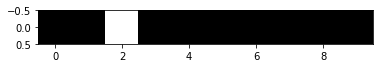

In [100]:
plt.imshow(one_image, cmap ='gray')